In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('dlexp1').sheet1

In [ ]:

worksheet = gc.open('dlexp1').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df

,input,output
0,1.0,20.0
1,2.0,40.0
2,3.0,60.0
3,4.0,80.0
4,5.0,100.0
5,6.0,120.0
6,7.0,140.0
7,8.0,160.0
8,9.0,180.0
9,10.0,200.0


In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# To scale
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
X = df[['input']].values
y = df[['output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='rmsprop',loss = 'mse')

In [ ]:
model.fit(X_train1,y_train,epochs=2200)

Epoch 1/2200
1/1 [==============================] - 1s 897ms/step - loss: 17490.7051
Epoch 2/2200
1/1 [==============================] - 0s 10ms/step - loss: 17482.4883
Epoch 3/2200
1/1 [==============================] - 0s 9ms/step - loss: 17476.5742
Epoch 4/2200
1/1 [==============================] - 0s 15ms/step - loss: 17471.7188
Epoch 5/2200
1/1 [==============================] - 0s 10ms/step - loss: 17467.4785
Epoch 6/2200
1/1 [==============================] - 0s 12ms/step - loss: 17463.6387
Epoch 7/2200
1/1 [==============================] - 0s 15ms/step - loss: 17460.1250
Epoch 8/2200
1/1 [==============================] - 0s 15ms/step - loss: 17456.8281
Epoch 9/2200
1/1 [==============================] - 0s 11ms/step - loss: 17453.7461
Epoch 10/2200
1/1 [==============================] - 0s 13ms/step - loss: 17450.7852
Epoch 11/2200
1/1 [==============================] - 0s 11ms/step - loss: 17447.9414
Epoch 12/2200
1/1 [==============================] - 0s 13ms/step - loss: 

In [ ]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

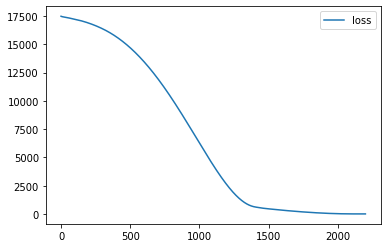

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 144ms/step - loss: 2.1546


2.154557466506958

In [ ]:
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 187ms/step - loss: 2.1546


2.154557466506958

In [ ]:
X_n1 = [[4]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
model.predict(X_n1_1)

1/1 [==============================] - 0s 161ms/step


array([[79.91176]], dtype=float32)